### using urllib to read html data from webpages

In [4]:
from urllib.request import urlopen
x = urlopen('https://www.bbc.co.uk/')
k=x.read()

In [5]:
k

b'<!DOCTYPE html>\n<!--[if lte IE 9]>\n  <html lang="en-GB" class="no-js no-flexbox no-flexboxlegacy b-reith-sans-font">\n<![endif]-->\n<!--[if gt IE 9]><!-->\n  <html lang="en-GB" class="no-js b-reith-sans-font b-reith-serif-font">\n<!--<![endif]-->\n<head>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><script type="text/javascript">\n      var _sf_startpt = (new Date()).getTime();\n    </script><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="The best of the BBC, with the latest news and sport headlines, weather, TV &amp; radio highlights and much more from across the whole of BBC Online" name="description"><meta content="BBC, British Broadcasting Corporation, BBCi, News, Sport, iPlayer, TV, Radio, Food, Music, Business, Arts, Bitesize, Lifestyle, Entertainment, Headlines" name="keywords"><meta property="og:title" content="BBC - Home"><meta property="og:type" content="website"><meta property="og:description" content="The best of 

In [6]:
parts=str(k).split("<a href=")
parts

['b\'<!DOCTYPE html>\\n<!--[if lte IE 9]>\\n  <html lang="en-GB" class="no-js no-flexbox no-flexboxlegacy b-reith-sans-font">\\n<![endif]-->\\n<!--[if gt IE 9]><!-->\\n  <html lang="en-GB" class="no-js b-reith-sans-font b-reith-serif-font">\\n<!--<![endif]-->\\n<head>\\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><script type="text/javascript">\\n      var _sf_startpt = (new Date()).getTime();\\n    </script><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="The best of the BBC, with the latest news and sport headlines, weather, TV &amp; radio highlights and much more from across the whole of BBC Online" name="description"><meta content="BBC, British Broadcasting Corporation, BBCi, News, Sport, iPlayer, TV, Radio, Food, Music, Business, Arts, Bitesize, Lifestyle, Entertainment, Headlines" name="keywords"><meta property="og:title" content="BBC - Home"><meta property="og:type" content="website"><meta property="og:description" content=

In [7]:
parts[1:5]

['"https://www.bbc.com/">Home</a></li><li class="orb-nav-newsdotcom">',
 '"https://www.bbc.com/news">News</a></li><li class="orb-nav-sport">',
 '"https://www.bbc.com/sport">Sport</a></li><li class="orb-nav-weather">',
 '"https://www.bbc.com/weather">Weather</a></li><li class="orb-nav-shop">']

In [8]:
for part in parts[1:5]:
    print(part.split('"')[1])

https://www.bbc.com/
https://www.bbc.com/news
https://www.bbc.com/sport
https://www.bbc.com/weather


In [ ]:
in_links=[]
parts=str(k).split("<a href=")
for part in parts:
    link=part.split('"')[1]
    if "www.bbc" not in link:pass
    else:
        in_links.append(link)
in_links

In [ ]:
len(in_links)

In [ ]:
in_links=set(in_links)
len(in_links)

### Accessing google search with urllib

In [9]:
url='https://www.google.com/search?q=python+programming+tutorials'
resp = urlopen(url)
respData = resp.read()
print(respData)

HTTPError: HTTP Error 403: Forbidden

In [10]:
from urllib.request import Request
url = 'https://www.google.com/search?q=python+programming+tutorials'

headers = {}
headers['User-Agent'] = r"Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"

req = Request(url, headers = headers)
resp = urlopen(req)
respData = resp.read()

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>python programming tutorials - Google Search</title><script nonce="nyNPZWqHpeAiFy4Lsu3bdg==">(function(){window.google={kEI:\'x6UhXfLqG5Kv0PEP1oWL6A0\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_x6UhXfLqG5Kv0PEP1oWL6A0\',kGL:\'IN\'};google.sn=\'web\';google.kHL=\'en-IN\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c
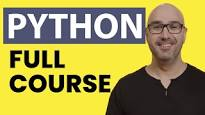
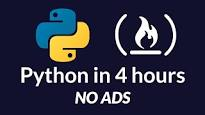

In [11]:
print(respData)

### Parsing with BeautifulSoup

In [12]:
from bs4 import BeautifulSoup

In [13]:
mydata=urlopen("https://in.finance.yahoo.com/q?s=SBIN.BO").read()
soup = BeautifulSoup(mydata,'lxml')
soup

<!DOCTYPE html>
<html class="NoJs featurephone" id="atomic" lang="en-IN"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>STATE BANK OF INDIA (SBIN.BO) Stock Price, Quote, History &amp; News</title><meta content="SBIN.BO, STATE BANK OF INDIA, SBIN.BO stock chart, STATE BANK OF INDIA stock chart, stock chart, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="131747896861126" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Find the latest STATE BANK OF INDIA (SBIN.BO) stock quote, history, news and other vital information to help you with your stock trading and investing." lang="en-US" name="description"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"

In [14]:
soup.findAll("a")

[<a class="Bgpx(0) Bgr(nr) Cur(p) D(b) H(35px) Bgz(702px) Mx(a)! W(92px)" data-reactid="12" href="https://in.finance.yahoo.com/" id="uh-logo"><b class="Hidden" data-reactid="13">Yahoo</b></a>,
 <a class="Pos(r) D(ib) Ta(s) Td(n):h" data-reactid="45" href="https://mail.yahoo.com/?.intl=in&amp;.lang=en-IN&amp;.partner=none&amp;.src=finance" id="uh-mail"><svg class="Cur(p)" data-icon="NavMail" data-reactid="46" height="35" style="fill:#400090;stroke:#400090;stroke-width:0;vertical-align:bottom;" viewbox="0 0 512 512" width="30"><path d="M460.586 91.31H51.504c-10.738 0-19.46 8.72-19.46 19.477v40.088l224 104.03 224-104.03v-40.088c0-10.757-8.702-19.478-19.458-19.478M32.046 193.426V402.96c0 10.758 8.72 19.48 19.458 19.48h409.082c10.756 0 19.46-8.722 19.46-19.48V193.428l-224 102.327-224-102.327z" data-reactid="47"></path></svg><b class="Lh(userNavTextLh) D(ib) C($c-fuji-purple-1-c) Fz(14px) Fw(b) Va(t) Mstart(6px)" data-reactid="48">Mail</b></a>,
 <a class="Lh(50px) Ta(c) Bdbw(3px) Bdbs(s) Px(

In [15]:
all_links=soup.findAll("a")
for elem in all_links:
    link=str(elem.get('href'))
    print(link)

https://in.finance.yahoo.com/
https://mail.yahoo.com/?.intl=in&.lang=en-IN&.partner=none&.src=finance
/quote/SBIN.BO?p=SBIN.BO
/quote/SBIN.BO/key-statistics?p=SBIN.BO
/quote/SBIN.BO/history?p=SBIN.BO
/quote/SBIN.BO/profile?p=SBIN.BO
/quote/SBIN.BO/financials?p=SBIN.BO
/quote/SBIN.BO/analysis?p=SBIN.BO
/quote/SBIN.BO/options?p=SBIN.BO
/quote/SBIN.BO/holders?p=SBIN.BO
/quote/SBIN.BO/sustainability?p=SBIN.BO
/quote/SBIN.BO/news?p=SBIN.BO
/quote/SBIN.BO/press-releases?p=SBIN.BO
/news/wilful-defaults-india-cross-21-131914303.html
/news/nclt-admits-insolvency-plea-against-134437326.html
/news/nifty-sensex-edge-lower-over-050958387.html
/news/jet-airways-slumps-reports-etihads-044735809.html
/news/state-bank-india-says-two-095227463.html
/news/state-bank-india-gets-sealed-142812373.html
/news/state-bank-india-turns-profit-083353157.html
/m/730e15e2-c699-3918-b5a0-169ab2239590/ss_don%26%2339%3Bt-blame-state-banks.html
/m/cec40fb6-0b5b-3b15-b2ce-71581ece6c6a/ss_jet-airways%26%2339%3B-lenders-ho

In [16]:
len(soup.findAll('table'))

2

In [17]:
mytable=soup.findAll('table')[0]
mytable.findAll('tr')

[<tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($c-fuji-grey-c) H(36px)" data-reactid="11"><td class="C(black) W(51%)" data-reactid="12"><span data-reactid="13">Previous close</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="14" data-test="PREV_CLOSE-value"><span class="Trsdu(0.3s)" data-reactid="15">367.30</span></td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($c-fuji-grey-c) H(36px)" data-reactid="16"><td class="C(black) W(51%)" data-reactid="17"><span data-reactid="18">Open</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="19" data-test="OPEN-value"><span class="Trsdu(0.3s)" data-reactid="20">369.25</span></td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($c-fuji-grey-c) H(36px)" data-reactid="21"><td class="C(black) W(51%)" data-reactid="22"><span data-reactid="23">Bid</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="24" data-test="BID-value"><span class="Trsdu(0.3s)" data-reactid="25">370.60 x 0</span></td></tr>,
 <tr class="Bxz(bb) Bdbw(1px

In [18]:
for rows in mytable.findAll('tr'):
    data=rows.findAll('td')
    print_data=[]
    for d in data:
        print_data.append(d.text)
    print(print_data)

['Previous close', '367.30']
['Open', '369.25']
['Bid', '370.60 x 0']
['Ask', '0.00 x 0']
["Day's range", '366.00 - 373.40']
['52-week range', '247.65 - 373.40']
['Volume', '1,784,869']
['Avg. volume', '1,206,255']


## Google Scraping

In [ ]:
!pip install requests_html

In [1]:
from requests_html import HTMLSession
import os

class EntityScraper:

	def __init__(self, query, num_entities):

		self.payload = {'q': query}
		self.session = HTMLSession()
		self.num_entities = num_entities

	def scrape(self):

		r = self.session.get("https://www.google.co.in/search", params=self.payload)
		if r.status_code == 200:
			tags = r.html.find(".klitem")
			if not tags:
				raise Exception("Bad query, please try again")

			entity_list = []
			for tag in tags:
				entity_list.append(tag.attrs['aria-label'])

			if len(entity_list) > self.num_entities:
			    entity_list = entity_list[:self.num_entities]

			print("Entity list obtained is {}".format(entity_list))

		else:
			raise Exception("status code " + str(r.status_code))

		return entity_list

In [2]:
scraper = EntityScraper('top actors in india', 5)

In [3]:
scraper.scrape()

Exception: Bad query, please try again